#Import libraries

In [ ]:
!pip install pyspark

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pyspark.sql import SparkSession
import warnings
warnings.filterwarnings('ignore')
import time

#Reading the data

In [ ]:
df = pd.read_excel('/content/finalJSON.xlsx')
df

pageurl  \
0      https://www.booking.com/hotel/in/oyo-home-2984...   
1      https://www.booking.com/hotel/in/insoul-cafe-a...   
2      https://www.booking.com/hotel/in/the-bell-conv...   
3      https://www.booking.com/hotel/in/paradise-gues...   
4      https://www.booking.com/hotel/in/pawan-putra-g...   
...                                                  ...   
29983  https://www.booking.com/hotel/in/the-country-r...   
29984  https://www.booking.com/hotel/in/oyo-46112-nes...   
29985  https://www.booking.com/hotel/in/luxury-bunk-h...   
29986  https://www.booking.com/hotel/in/madhuban-apna...   
29987  https://www.booking.com/hotel/in/sarovar-inn.e...   

                                uniq_id  hotel_id  \
0      34709b14bed89e484f902363f4878e55   5530755   
1      7a8bb8eb5bed5a77a1755ed71a36bc8d   3552953   
2      7d644c8d8c8d63abfb835c85b5483387    280395   
3      8def510efe71560bfb7b9dc4c8d5f9f5   2536985   
4      25936fe45ad683fdc94775f12abcd521    772069   
...                                 ...       ...   
29983  3c7a19b77e7d817bf9c22f93e15367f2   3563633   
29984  e7f1d0b1028a5333d2080187b0981393   5589445   
29985  5a41c188ca24a17f7df951689768552b   5675370   
29986  471ddc9ac010be8f176914f8c9a180b6   5662441   
29987  ce9eeb37d03ab09abe10006462bf9f89   6289799   

                                  hotel_name  default_rank  price_rank  \
0            Luxurious 1BR Dwelling in Kochi         250.0        12.0   
1                  InSoul cafe & Guest House         116.0        42.0   
2      Manpho Bell Hotel & Convention Center          64.0        29.0   
3                 Hotel Paradise Guest House         487.0        13.0   
4                   Treebo Trend Pawan Putra         144.0       165.0   
...                                      ...           ...         ...   
29983                   OYO 68628 Manraj B&b           NaN       832.0   
29984              OYO 46112 Nest Presidency         107.0        44.0   
29985                      Luxury Bunk House           NaN       177.0   
29986                     MADHUBAN APNA GHAR          89.0        33.0   
29987                            SAROVAR INN          15.0        21.0   

               ota checkin_date               crawled_date  review_count  \
0      booking.com   2020-03-26  2020-03-20 09:43:15 +0000           NaN   
1      booking.com   2020-03-20  2020-03-18 10:07:23 +0000          26.0   
2      booking.com   2020-03-09  2020-03-08 10:53:04 +0000           1.0   
3      booking.com   2020-03-08  2020-03-05 10:11:19 +0000          24.0   
4      booking.com   2020-03-22  2020-03-20 09:40:36 +0000          28.0   
...            ...          ...                        ...           ...   
29983  booking.com   2020-03-16  2020-03-16 10:46:33 +0000          30.0   
29984  booking.com   2020-03-10  2020-03-08 09:38:07 +0000           NaN   
29985  booking.com   2020-03-15  2020-03-14 11:44:16 +0000           NaN   
29986  booking.com   2020-03-19  2020-03-18 09:46:51 +0000          10.0   
29987  booking.com   2020-03-09  2020-03-06 10:14:20 +0000           1.0   

       rating_count                   room_type_name  room_type_price  \
0               NaN                        Apartment            895.0   
1               8.9  Deluxe Double Room with Balcony            600.0   
2               NaN                            Suite           8611.0   
3               5.4               Budget Double Room            500.0   
4               7.7             Standard Double Room           1568.0   
...             ...                              ...              ...   
29983           6.5                      Deluxe Room           1904.0   
29984           NaN               Budget Double Room           1600.0   
29985           NaN       6-Bed Mixed Dormitory Room           5040.0   
29986           5.4               Budget Double Room            700.0   
29987           NaN    Standard Double Room with Fan            600.0   

       room_

In [ ]:
spark = SparkSession.builder.appName("BigDataEND").getOrCreate()

In [ ]:
df = spark.createDataFrame(df)

In [ ]:
display(df.filter(' review_count == "nan"').count())

8008

In [ ]:
df2 = df[['room_type_price', 'default_rank']]
df2.show()

+---------------+------------+
|room_type_price|default_rank|
+---------------+------------+
|          895.0|       250.0|
|          600.0|       116.0|
|         8611.0|        64.0|
|          500.0|       487.0|
|         1568.0|       144.0|
|         1274.0|        11.0|
|          999.0|       473.0|
|         1000.0|       134.0|
|            NaN|         NaN|
|          724.0|       923.0|
|         1619.0|       125.0|
|        16335.0|        32.0|
|         2688.0|       356.0|
|         1613.0|       138.0|
|          350.0|       196.0|
|         2128.0|       227.0|
|         2436.0|        85.0|
|          550.0|       348.0|
|         1218.0|       340.0|
|         4714.0|        37.0|
+---------------+------------+
only showing top 20 rows



In [ ]:
display(df.filter(' room_type_price == "nan"').count())

1096

In [ ]:
NaN_room_type_price_count = df2.filter(df2['room_type_price'] == 'NaN').count()
print(f"Number of rows with 'NaN' as room_type_price: {NaN_room_type_price_count}")

# Drop rows where 'room_type_price' is 'NaN'
df2 = df2.filter(df2['room_type_price'] != 'NaN')

# Count rows with 'NaN' as room_type_price after dropping
NaN_room_type_price_count_after = df2.filter(df2['room_type_price'] == 'NaN').count()
print(f"Number of rows with 'NaN' as room_type_price after filtering: {NaN_room_type_price_count_after}")

df2.show()

Number of rows with 'NaN' as room_type_price: 1096
Number of rows with 'NaN' as room_type_price after filtering: 0
+---------------+------------+
|room_type_price|default_rank|
+---------------+------------+
|          895.0|       250.0|
|          600.0|       116.0|
|         8611.0|        64.0|
|          500.0|       487.0|
|         1568.0|       144.0|
|         1274.0|        11.0|
|          999.0|       473.0|
|         1000.0|       134.0|
|          724.0|       923.0|
|         1619.0|       125.0|
|        16335.0|        32.0|
|         2688.0|       356.0|
|         1613.0|       138.0|
|          350.0|       196.0|
|         2128.0|       227.0|
|         2436.0|        85.0|
|          550.0|       348.0|
|         1218.0|       340.0|
|         4714.0|        37.0|
|         1355.0|       290.0|
+---------------+------------+
only showing top 20 rows



In [ ]:
display(df.filter(' default_rank == "nan"').count())

0

In [ ]:
NaN_default_rank_count = df2.filter(df2['default_rank'] == 'NaN').count()
print(f"Number of rows with 'NaN' as default_rank: {NaN_default_rank_count}")

# Drop rows where 'default_rank' is 'NaN'
df2 = df2.filter(df2['default_rank'] != 'NaN')

# Count rows with 'NaN' as default_rank after dropping
NaN_default_rank_count_after = df2.filter(df2['default_rank'] == 'NaN').count()
print(f"Number of rows with 'NaN' as default_rank after filtering: {NaN_default_rank_count_after}")

df2.show()

Number of rows with 'NaN' as default_rank: 0
Number of rows with 'NaN' as default_rank after filtering: 0
+---------------+------------+
|room_type_price|default_rank|
+---------------+------------+
|          895.0|       250.0|
|          600.0|       116.0|
|         8611.0|        64.0|
|          500.0|       487.0|
|         1568.0|       144.0|
|         1274.0|        11.0|
|          999.0|       473.0|
|         1000.0|       134.0|
|          724.0|       923.0|
|         1619.0|       125.0|
|        16335.0|        32.0|
|         2688.0|       356.0|
|         1613.0|       138.0|
|          350.0|       196.0|
|         2128.0|       227.0|
|         2436.0|        85.0|
|          550.0|       348.0|
|         1218.0|       340.0|
|         4714.0|        37.0|
|         1355.0|       290.0|
+---------------+------------+
only showing top 20 rows



In [ ]:
NaN_review_count_count = df.filter(df['review_count'] == 'NaN').count()
print(f"Number of rows with 'NaN' as review_count: {NaN_review_count_count}")

# Drop rows where 'review_count' is 'NaN'
df = df.filter(df['review_count'] != 'NaN')

# Count rows with 'NaN' as review_count after dropping
NaN_review_count_count_after = df.filter(df['review_count'] == 'NaN').count()
print(f"Number of rows with 'NaN' as review_count after filtering: {NaN_review_count_count_after}")

df.show()

Number of rows with 'NaN' as review_count: 8008
Number of rows with 'NaN' as review_count after filtering: 0
+--------------------+--------------------+--------+--------------------+------------+----------+-----------+------------+--------------------+------------+------------+--------------------+---------------+-------------------+-------------------+----------------------+
|             pageurl|             uniq_id|hotel_id|          hotel_name|default_rank|price_rank|        ota|checkin_date|        crawled_date|review_count|rating_count|      room_type_name|room_type_price|room_type_occupancy|room_type_breakfast|room_type_cancellation|
+--------------------+--------------------+--------+--------------------+------------+----------+-----------+------------+--------------------+------------+------------+--------------------+---------------+-------------------+-------------------+----------------------+
|https://www.booki...|7a8bb8eb5bed5a77a...| 3552953|InSoul cafe & Gue...|       1

In [ ]:
df.show()

+--------------------+--------------------+--------+--------------------+------------+----------+-----------+------------+--------------------+------------+------------+--------------------+---------------+-------------------+-------------------+----------------------+
|             pageurl|             uniq_id|hotel_id|          hotel_name|default_rank|price_rank|        ota|checkin_date|        crawled_date|review_count|rating_count|      room_type_name|room_type_price|room_type_occupancy|room_type_breakfast|room_type_cancellation|
+--------------------+--------------------+--------+--------------------+------------+----------+-----------+------------+--------------------+------------+------------+--------------------+---------------+-------------------+-------------------+----------------------+
|https://www.booki...|34709b14bed89e484...| 5530755|Luxurious 1BR Dwe...|       250.0|      12.0|booking.com|  2020-03-26|2020-03-20 09:43:...|         NaN|         NaN|           Apartment|

In [ ]:
df = df.toPandas()
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0         13               2015   
1       Resort Hotel            0         14               2015   
2       Resort Hotel            0         14               2015   
3       Resort Hotel            0          9               2015   
4       Resort Hotel            1         85               2015   
...              ...          ...        ...                ...   
102891    City Hotel            0         23               2017   
102892    City Hotel            0        102               2017   
102893    City Hotel            0         34               2017   
102894    City Hotel            0        109               2017   
102895    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
102891             August                        35   
102892             August                        35   
102893             August                        35   
102894             August                        35   
102895             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
102891                         30                        2   
102892                         31                        2   
102893                         31                        2   
102894                         31                        2   
102895                         29                        2   

        stays_in_week_nights  adults  ... booking_changes  deposit_type agent  \
0                          1       1  ...               0    No Deposit   304   
1                          2       2  ...               0    No Deposit   240   
2                          2       2  ...               0    No Deposit   240   
3                          2       2  ...               0    No Deposit   303   
4                          3       2  ...               0    No Deposit   240   
...                      ...     ...  ...             ...           ...   ...   
102891                     5       2  ...               0    No Deposit   394   
102892                     5       3  ...               0    No Deposit     9   
102893                     5       2  ...               0    No Deposit     9   
102894                     5       2  ...               0    No Deposit    89   
102895                     7       2  ...               0    No Deposit     9   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient   75.00   
1                         0     Transient   98.00   
2                         0     Transient   98.00   
3                         0     Transient  103.00   
4                         0     Transient   82.00   
...                     ...           ...     ...   
102891                    0     Transient   96.14   
102892                    0     Transient  225.43   
102893                    0     Transient  157.71   
102894                    0     Transient  104.40   
102895                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          1

In [ ]:
df = spark.createDataFrame(df)

In [ ]:
df2 = df[['room_type_price', 'default_rank']]
df2.dropna()

room_type_price  default_rank
0                895.0         250.0
1                600.0         116.0
2               8611.0          64.0
3                500.0         487.0
4               1568.0         144.0
...                ...           ...
29981            700.0          71.0
29982           1996.0         112.0
29984           1600.0         107.0
29986            700.0          89.0
29987            600.0          15.0

[26397 rows x 2 columns]

# My pre reading for the data

In [ ]:
fig = px.scatter(df2, x='default_rank', y='room_type_price',
                 color='room_type_price',
                 title='Scatter plot',
                 labels={'room_type_price': 'room_type_price', 'default_rank': 'default_rank'},
                 opacity=0.7)

fig.show()

In [ ]:
df3 = df[['room_type_price', 'rating_count']]
df3.dropna()

room_type_price  rating_count
1                600.0           8.9
3                500.0           5.4
4               1568.0           7.7
5               1274.0           8.6
7               1000.0           2.7
...                ...           ...
29980           4385.0           7.6
29981            700.0           7.5
29982           1996.0           7.5
29983           1904.0           6.5
29986            700.0           5.4

[16806 rows x 2 columns]

In [ ]:
fig = px.scatter(df3, x='rating_count', y='room_type_price',
                 color='room_type_price',
                 title='Scatter plot',
                 labels={'room_type_price': 'room_type_price', 'rating_count': 'rating_count'},
                 opacity=0.7)

fig.show()

In [ ]:
df2 = df[['room_type_price', 'room_type_occupancy']]
df2.dropna()

room_type_price  room_type_occupancy
0                895.0                    2
1                600.0                    2
2               8611.0                    2
3                500.0                    2
4               1568.0                    2
...                ...                  ...
29983           1904.0                    2
29984           1600.0                    2
29985           5040.0                    7
29986            700.0                    2
29987            600.0                    2

[28646 rows x 2 columns]

In [ ]:
fig = px.scatter(df2, x='room_type_occupancy', y='room_type_price',
                 color='room_type_price',
                 title='Scatter plot',
                 labels={'room_type_price': 'room_type_price', 'room_type_occupancy': 'room_type_occupancy'},
                 opacity=0.7)

fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29988 entries, 0 to 29987
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pageurl                 29988 non-null  object 
 1   uniq_id                 29988 non-null  object 
 2   hotel_id                29988 non-null  int64  
 3   hotel_name              29988 non-null  object 
 4   default_rank            27493 non-null  float64
 5   price_rank              24165 non-null  float64
 6   ota                     29988 non-null  object 
 7   checkin_date            29988 non-null  object 
 8   crawled_date            29988 non-null  object 
 9   review_count            21980 non-null  float64
 10  rating_count            17891 non-null  float64
 11  room_type_name          29988 non-null  object 
 12  room_type_price         28646 non-null  float64
 13  room_type_occupancy     29988 non-null  int64  
 14  room_type_breakfast     29988 non-null

In [ ]:
df.describe()

hotel_id  default_rank    price_rank  review_count  rating_count  \
count  2.998800e+04  27493.000000  24165.000000  21980.000000  17891.000000   
mean   3.824558e+06    256.020442    247.072460     73.416288      7.518568   
std    2.043778e+06    236.271357    231.853188    131.818243      1.311161   
min    7.400500e+04      0.000000      0.000000      1.000000      1.000000   
25%    1.997894e+06     79.000000     74.000000      4.000000      6.800000   
50%    4.377508e+06    177.000000    171.000000     19.000000      7.700000   
75%    5.738187e+06    362.000000    350.000000     79.000000      8.400000   
max    6.373091e+06   1159.000000   1156.000000    989.000000     10.000000   

       room_type_price  room_type_occupancy  
count     28646.000000         29988.000000  
mean       3231.014557             2.449980  
std        6472.254252             2.076905  
min          90.000000             1.000000  
25%        1350.000000             2.000000  
50%        2072.000000             2.000000  
75%        3427.000000             2.000000  
max      735048.000000            70.000000

In [ ]:
df.isnull().sum()

pageurl                       0
uniq_id                       0
hotel_id                      0
hotel_name                    0
default_rank               2495
price_rank                 5823
ota                           0
checkin_date                  0
crawled_date                  0
review_count               8008
rating_count              12097
room_type_name                0
room_type_price            1342
room_type_occupancy           0
room_type_breakfast           0
room_type_cancellation        0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df

pageurl  \
1      https://www.booking.com/hotel/in/insoul-cafe-a...   
3      https://www.booking.com/hotel/in/paradise-gues...   
4      https://www.booking.com/hotel/in/pawan-putra-g...   
5      https://www.booking.com/hotel/in/oyo-25091-hom...   
11     https://www.booking.com/hotel/in/the-house-of-...   
...                                                  ...   
29979  https://www.booking.com/hotel/in/sheraton-new-...   
29980  https://www.booking.com/hotel/in/grand-o7.en-g...   
29981  https://www.booking.com/hotel/in/zen-hostel.en...   
29982  https://www.booking.com/hotel/in/guest-inn-sui...   
29986  https://www.booking.com/hotel/in/madhuban-apna...   

                                uniq_id  hotel_id  \
1      7a8bb8eb5bed5a77a1755ed71a36bc8d   3552953   
3      8def510efe71560bfb7b9dc4c8d5f9f5   2536985   
4      25936fe45ad683fdc94775f12abcd521    772069   
5      e82899a79ba6c12efc328baa3eb0d51d   4416287   
11     a9424d6d27bd822defbb254ffb11041e   4255025   
...                                 ...       ...   
29979  154bbc5b18c9e19d2abf307034ebf806   1297132   
29980  993b109333825121ed66c2c09c926576   1508657   
29981  c91a08dd1dced8fdacb11d96a0e7df51   6017246   
29982  477abdc823f50afa9f0ce467571fa087   5419483   
29986  471ddc9ac010be8f176914f8c9a180b6   5662441   

                                              hotel_name  default_rank  \
1                              InSoul cafe & Guest House         116.0   
3                             Hotel Paradise Guest House         487.0   
4                               Treebo Trend Pawan Putra         144.0   
5                           Home Sky View StudioMadikeri          11.0   
11     The House of Legends - 3 BHK Villa || Private ...          32.0   
...                                                  ...           ...   
29979  Sheraton New Delhi Hotel - Member of ITC Hotel...          90.0   
29980                       Grand O7 Suites & Convention          61.0   
29981                                         Zen Hostel          71.0   
29982                                   Guest inn Suites         112.0   
29986                                 MADHUBAN APNA GHAR          89.0   

       price_rank          ota checkin_date               crawled_date  \
1            42.0  booking.com   2020-03-20  2020-03-18 10:07:23 +0000   
3            13.0  booking.com   2020-03-08  2020-03-05 10:11:19 +0000   
4           165.0  booking.com   2020-03-22  2020-03-20 09:40:36 +0000   
5            61.0  booking.com   2020-04-03  2020-03-23 11:13:37 +0000   
11           22.0  booking.com   2020-03-01  2020-03-01 11:19:49 +0000   
...           ...          ...          ...                        ...   
29979        94.0  booking.com   2020-03-06  2020-03-03 11:54:16 +0000   
29980       234.0  booking.com   2020-03-17  2020-03-11 10:05:56 +0000   
29981         7.0  booking.com   2020-03-13  2020-03-08 09:38:26 +0000   
29982       142.0  booking.com   2020-03-17  2020-03-11 10:34:50 +0000   
29986        33.0  booking.com   2020-03-19  2020-03-18 09:46:51 +0000   

       review_count  rating_count  \
1              26.0           8.9   
3              24.0           5.4   
4              28.0           7.7   
5               3.0           8.6   
11             40.0           9.8   
...             ...           ...   
29979         531.0           8.4   
29980          90.0           7.6   
29981           4.0           7.5   
29982          25.0           7.5   
29986          10.0           5.4   

                                          room_type_name  room_type_price  \
1                        Deluxe Double Room with Balcony            600.0   
3                                     Budget Double Room            500.0   
4                                   Standard Double Room           1568.0   
5                                              Apartment           1274.0   
11                               Villa with Private Pool          16335.0   
...   

In [ ]:
df.isnull().sum()

pageurl                       0
uniq_id                       0
hotel_id                      0
hotel_name                    0
default_rank               2495
price_rank                 5823
ota                           0
checkin_date                  0
crawled_date                  0
review_count               8008
rating_count              12097
room_type_name                0
room_type_price            1342
room_type_occupancy           0
room_type_breakfast           0
room_type_cancellation        0
dtype: int64

In [ ]:
df3 = df[['room_type_cancellation', 'room_type_breakfast']]
df3.dropna()

room_type_cancellation room_type_breakfast
0          free_cancellation           Room Only
1             non_refundable           Room Only
2             non_refundable          half_board
3          free_cancellation           Room Only
4          free_cancellation           breakfast
...                      ...                 ...
29983      special_condition           Room Only
29984      free_cancellation           breakfast
29985         non_refundable           Room Only
29986         non_refundable           Room Only
29987         non_refundable           Room Only

[29988 rows x 2 columns]

In [ ]:
y = df3['room_type_cancellation'].count()

#Room breakfast

In [ ]:
braekfast = df.select("room_type_breakfast")


In [ ]:
display(braekfast.filter(' room_type_breakfast == "NaN"').count())

0

In [ ]:
braekfast = braekfast.toPandas()
braekfast

room_type_breakfast
0               Room Only
1               Room Only
2              half_board
3               Room Only
4               breakfast
...                   ...
29983           Room Only
29984           breakfast
29985           Room Only
29986           Room Only
29987           Room Only

[29988 rows x 1 columns]

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame and you want to create a count plot for 'room_type_breakfast'
fig = px.histogram(braekfast, x='room_type_breakfast', histfunc='count')

# Show the plot
fig.show()

<Axes: xlabel='room_type_breakfast', ylabel='count'>

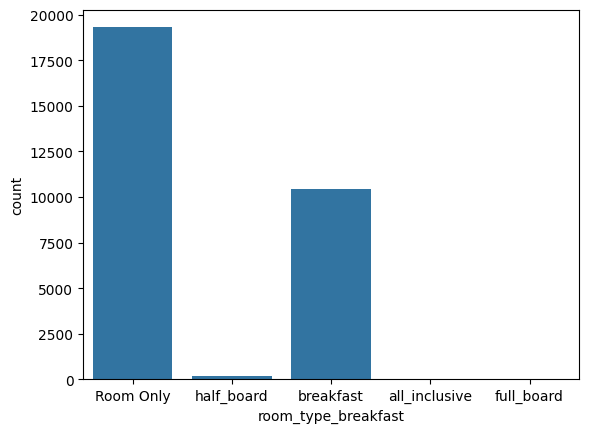

In [ ]:
sns.countplot(x='room_type_breakfast', data=braekfast)

In [ ]:
braekfast = spark.createDataFrame(braekfast)

#Cancellation

In [ ]:
df.show()

+--------------------+--------------------+--------+--------------------+------------+----------+-----------+------------+--------------------+------------+------------+--------------------+---------------+-------------------+-------------------+----------------------+
|             pageurl|             uniq_id|hotel_id|          hotel_name|default_rank|price_rank|        ota|checkin_date|        crawled_date|review_count|rating_count|      room_type_name|room_type_price|room_type_occupancy|room_type_breakfast|room_type_cancellation|
+--------------------+--------------------+--------+--------------------+------------+----------+-----------+------------+--------------------+------------+------------+--------------------+---------------+-------------------+-------------------+----------------------+
|https://www.booki...|34709b14bed89e484...| 5530755|Luxurious 1BR Dwe...|       250.0|      12.0|booking.com|  2020-03-26|2020-03-20 09:43:...|         NaN|         NaN|           Apartment|

In [ ]:
cancellation = df.select("room_type_cancellation")
cancellation.show()

+----------------------+
|room_type_cancellation|
+----------------------+
|     free_cancellation|
|        non_refundable|
|        non_refundable|
|     free_cancellation|
|     free_cancellation|
|     free_cancellation|
|     free_cancellation|
|     free_cancellation|
|        Non-refundable|
|        non_refundable|
|     free_cancellation|
|     special_condition|
|        non_refundable|
|     free_cancellation|
|     free_cancellation|
|        non_refundable|
|        non_refundable|
|     free_cancellation|
|        non_refundable|
|        non_refundable|
+----------------------+
only showing top 20 rows



In [ ]:
display(cancellation.filter(' room_type_cancellation == "Null"').count())

0

In [ ]:
cancellation = cancellation.toPandas()
cancellation

room_type_cancellation
0          free_cancellation
1             non_refundable
2             non_refundable
3          free_cancellation
4          free_cancellation
...                      ...
29983      special_condition
29984      free_cancellation
29985         non_refundable
29986         non_refundable
29987         non_refundable

[29988 rows x 1 columns]

In [ ]:
import plotly.express as px

# Assuming `cancellation` is your DataFrame

# Calculate the counts of room_type_cancellation
room_type_cancellation_counts = cancellation['room_type_cancellation'].value_counts().reset_index()
room_type_cancellation_counts.columns = ['room_type_cancellation', 'count']

# Create the pie chart using Plotly Express
fig = px.pie(
    room_type_cancellation_counts,
    names='room_type_cancellation',
    values='count',
    title='Count of room_type_cancellation',
    hole=0.3  # If you want a donut chart, otherwise remove this
)

# Update layout for a better appearance
fig.update_traces(textinfo='percent+label', rotation=140)
fig.show()


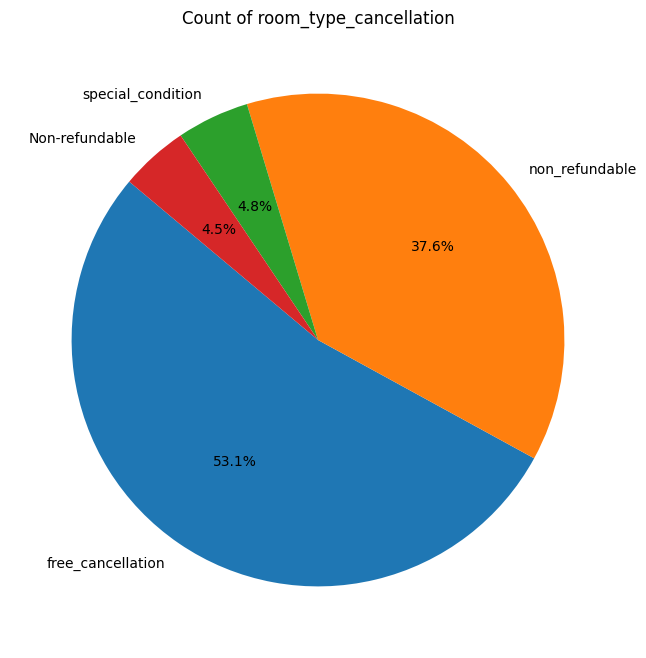

In [ ]:
room_type_cancellation_counts = cancellation['room_type_cancellation'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(room_type_cancellation_counts, labels=room_type_cancellation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of room_type_cancellation')
plt.show()

<Axes: xlabel='room_type_cancellation', ylabel='count'>

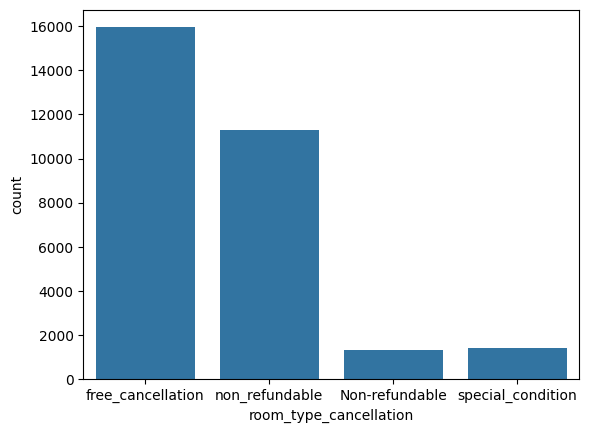

In [ ]:
sns.countplot(x='room_type_cancellation', data=cancellation)

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame and you want to create a count plot for 'room_type_cancellation'
fig = px.histogram(cancellation, x='room_type_cancellation', histfunc='count')

# Show the plot
fig.show()

In [ ]:
cancellation = spark.createDataFrame(cancellation)

#Breakfast and Cancellation

In [ ]:
roca = df.select("room_type_breakfast", "room_type_cancellation")
roca.show()

+-------------------+----------------------+
|room_type_breakfast|room_type_cancellation|
+-------------------+----------------------+
|          Room Only|     free_cancellation|
|          Room Only|        non_refundable|
|         half_board|        non_refundable|
|          Room Only|     free_cancellation|
|          breakfast|     free_cancellation|
|          Room Only|     free_cancellation|
|          Room Only|     free_cancellation|
|          Room Only|     free_cancellation|
|          Room Only|        Non-refundable|
|          breakfast|        non_refundable|
|          breakfast|     free_cancellation|
|          Room Only|     special_condition|
|          breakfast|        non_refundable|
|          breakfast|     free_cancellation|
|          breakfast|     free_cancellation|
|          Room Only|        non_refundable|
|          breakfast|        non_refundable|
|          breakfast|     free_cancellation|
|          Room Only|        non_refundable|
|         

In [ ]:
roca = roca.toPandas()
roca

room_type_breakfast room_type_cancellation
0               Room Only      free_cancellation
1               Room Only         non_refundable
2              half_board         non_refundable
3               Room Only      free_cancellation
4               breakfast      free_cancellation
...                   ...                    ...
29983           Room Only      special_condition
29984           breakfast      free_cancellation
29985           Room Only         non_refundable
29986           Room Only         non_refundable
29987           Room Only         non_refundable

[29988 rows x 2 columns]

In [ ]:
import plotly.express as px

# Assuming `roca` is your DataFrame
fig = px.histogram(
    roca,
    x='room_type_breakfast',
    color='room_type_cancellation',
    barmode='group',
    title='Count of room_type_cancellation by room_type_breakfast'
)

# Update the layout for the title and rotate the x-axis labels
fig.update_layout(
    xaxis_title='Room Type Breakfast',
    yaxis_title='Count',
    xaxis=dict(tickangle=45),
    title_x=0.5
)

# Show the plot
fig.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=roca, x='room_type_breakfast', hue='room_type_cancellation')
plt.title('Count of room_type_cancellation by room_type_breakfast')
plt.xticks(rotation=45)
plt.show()

In [ ]:
roca = spark.createDataFrame(roca)

#Occupancy

In [ ]:
occupancy = df.select("room_type_occupancy" , "room_type_cancellation")
occupancy.show()

+-------------------+----------------------+
|room_type_occupancy|room_type_cancellation|
+-------------------+----------------------+
|                  2|     free_cancellation|
|                  2|        non_refundable|
|                  2|        non_refundable|
|                  2|     free_cancellation|
|                  2|     free_cancellation|
|                  2|     free_cancellation|
|                  1|     free_cancellation|
|                  2|     free_cancellation|
|                  2|        Non-refundable|
|                  1|        non_refundable|
|                  2|     free_cancellation|
|                  8|     special_condition|
|                  2|        non_refundable|
|                  2|     free_cancellation|
|                  1|     free_cancellation|
|                  2|        non_refundable|
|                  2|        non_refundable|
|                  2|     free_cancellation|
|                  2|        non_refundable|
|         

In [ ]:
occupancy = occupancy.toPandas()
occupancy

room_type_occupancy room_type_cancellation
0                        2      free_cancellation
1                        2         non_refundable
2                        2         non_refundable
3                        2      free_cancellation
4                        2      free_cancellation
...                    ...                    ...
29983                    2      special_condition
29984                    2      free_cancellation
29985                    7         non_refundable
29986                    2         non_refundable
29987                    2         non_refundable

[29988 rows x 2 columns]

In [ ]:
# Find the top 10 room_type_occupancy
top_10_occupancy = occupancy['room_type_occupancy'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 room_type_occupancy
filtered_occupancy = occupancy[occupancy['room_type_occupancy'].isin(top_10_occupancy)]

# Create the plot using Plotly Express
fig = px.histogram(
    filtered_occupancy,
    x='room_type_occupancy',
    color='room_type_cancellation',
    barmode='group',
    title='Count of room_type_cancellation by room_type_occupancy (Top 10)'
)

# Update the layout for better visualization
fig.update_layout(
    xaxis_title='Room Type Occupancy',
    yaxis_title='Count',
    xaxis=dict(tickangle=45),
    title_x=0.5
)

# Show the plot
fig.show()

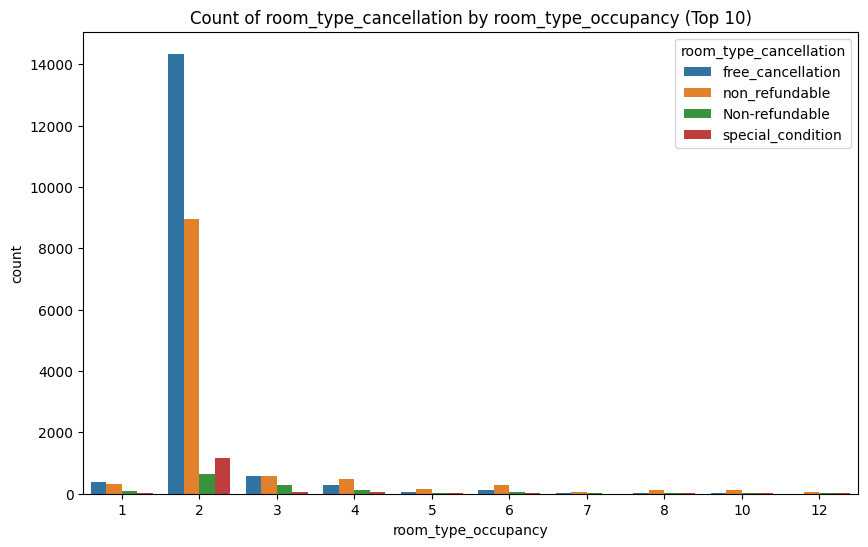

In [ ]:
plt.figure(figsize=(10, 6))
top_10_occupancy = occupancy['room_type_occupancy'].value_counts().nlargest(10).index
filtered_occupancy_occupancy = occupancy[occupancy['room_type_occupancy'].isin(top_10_occupancy)]
sns.countplot(data=filtered_occupancy_occupancy, x='room_type_occupancy', hue='room_type_cancellation')
plt.title('Count of room_type_cancellation by room_type_occupancy (Top 10)')
plt.show()


In [ ]:
occupancy = spark.createDataFrame(occupancy)

#Room types

In [ ]:
roomsName = df.select("room_type_name" , "room_type_occupancy" , "room_type_cancellation")
roomsName.show()

+--------------------+-------------------+----------------------+
|      room_type_name|room_type_occupancy|room_type_cancellation|
+--------------------+-------------------+----------------------+
|           Apartment|                  2|     free_cancellation|
|Deluxe Double Roo...|                  2|        non_refundable|
|               Suite|                  2|        non_refundable|
|  Budget Double Room|                  2|     free_cancellation|
|Standard Double Room|                  2|     free_cancellation|
|           Apartment|                  2|     free_cancellation|
|                Tent|                  1|     free_cancellation|
|Deluxe Double or ...|                  2|     free_cancellation|
|Standard Double Room|                  2|        Non-refundable|
|Single Room with ...|                  1|        non_refundable|
| Classic Triple Room|                  2|     free_cancellation|
|Villa with Privat...|                  8|     special_condition|
|         

In [ ]:
roomsName = roomsName.toPandas()
roomsName

room_type_name  room_type_occupancy  \
0                            Apartment                    2   
1      Deluxe Double Room with Balcony                    2   
2                                Suite                    2   
3                   Budget Double Room                    2   
4                 Standard Double Room                    2   
...                                ...                  ...   
29983                      Deluxe Room                    2   
29984               Budget Double Room                    2   
29985       6-Bed Mixed Dormitory Room                    7   
29986               Budget Double Room                    2   
29987    Standard Double Room with Fan                    2   

      room_type_cancellation  
0          free_cancellation  
1             non_refundable  
2             non_refundable  
3          free_cancellation  
4          free_cancellation  
...                      ...  
29983      special_condition  
29984      free_cancellation  
29985         non_refundable  
29986         non_refundable  
29987         non_refundable  

[29988 rows x 3 columns]

In [ ]:
# Grouping by room_type_name and summing the occupancy, then selecting the top 5
top_5_rooms_by_occupancy = roomsName.groupby('room_type_name')['room_type_occupancy'].sum().nlargest(5).reset_index()

# Plotting the data using Plotly Express
fig = px.bar(
    top_5_rooms_by_occupancy,
    x='room_type_name',
    y='room_type_occupancy',
    title='Sum of room_type_occupancy by top 5 room_type_name'
)

# Update the layout for better visualization
fig.update_layout(
    xaxis_title='Room Type Name',
    yaxis_title='Sum of Room Type Occupancy',
    xaxis=dict(tickangle=45),
    title_x=0.5
)

# Show the plot
fig.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Grouping by room_type_name and summing the occupancy, then selecting the top 5
top_5_rooms_by_occupancy = roomsName.groupby('room_type_name')['room_type_occupancy'].sum().nlargest(5).index
filtered_roomsName_top_5 = roomsName[roomsName['room_type_name'].isin(top_5_rooms_by_occupancy)]

# Plotting the data
sns.barplot(data=filtered_roomsName_top_5, x='room_type_name', y='room_type_occupancy', estimator=sum, ci=None)
plt.title('Sum of room_type_occupancy by top 5 room_type_name')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import plotly.express as px

# Assuming `roomsName` is your DataFrame

# Find the top 5 most canceled room types
top_5_rooms_canceled = roomsName['room_type_name'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 most canceled room types
filtered_roomsName_rooms = roomsName[roomsName['room_type_name'].isin(top_5_rooms_canceled)]

# Create the plot using Plotly Express
fig = px.histogram(
    filtered_roomsName_rooms,
    x='room_type_name',
    color='room_type_cancellation',
    barmode='group',
    title='Top 5 Most Canceled Room Types'
)

# Update the layout for better visualization
fig.update_layout(
    xaxis_title='Room Type Name',
    yaxis_title='Count of Cancellations',
    xaxis=dict(tickangle=45),
    title_x=0.5
)

# Show the plot
fig.show()


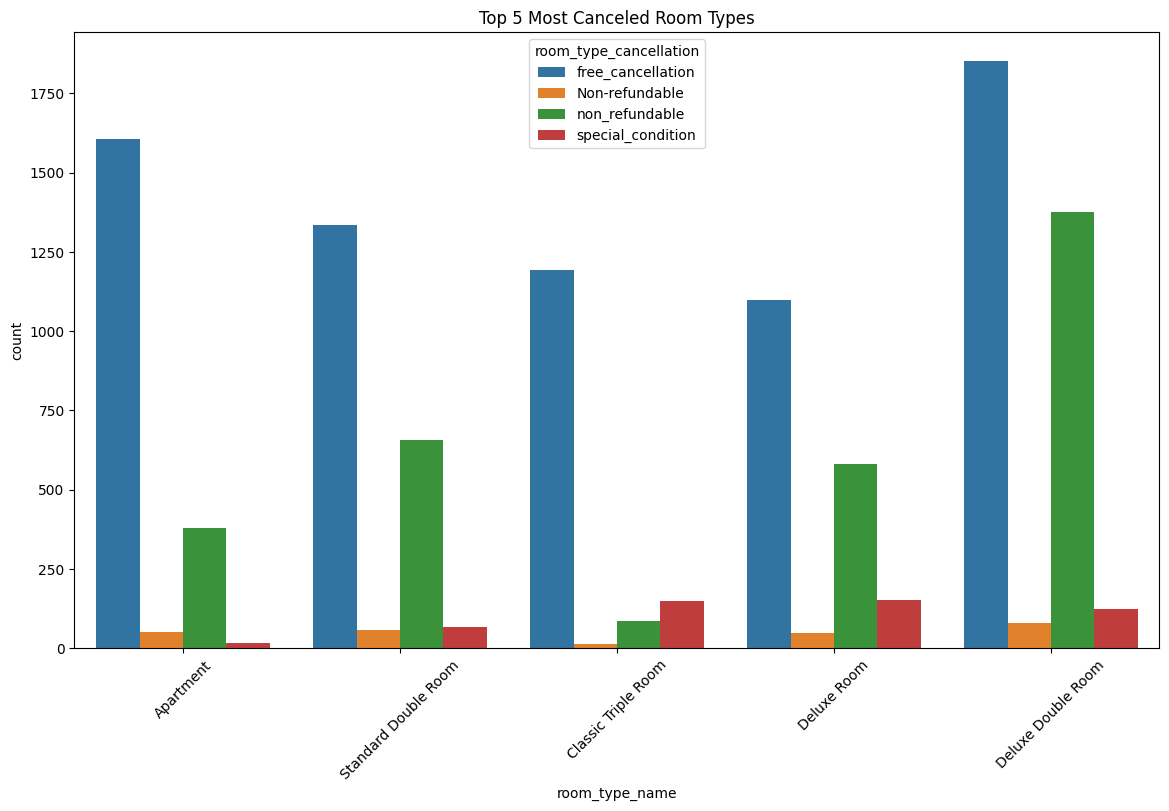

In [ ]:
plt.figure(figsize=(14, 8))
top_5_rooms_canceled = roomsName['room_type_name'].value_counts().nlargest(5).index
filtered_roomsName_rooms = roomsName[roomsName['room_type_name'].isin(top_5_rooms_canceled)]
sns.countplot(data=filtered_roomsName_rooms, x='room_type_name', hue='room_type_cancellation')
plt.title('Top 5 Most Canceled Room Types')
plt.xticks(rotation=45)
plt.show()


In [ ]:
roomsName = spark.createDataFrame(roomsName)